### Подготовка


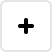
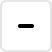
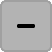
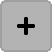
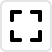
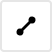
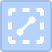
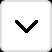
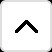
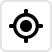


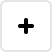
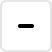
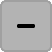
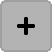
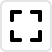
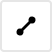
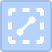
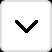
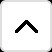
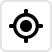

In [1]:
#import numpy as np
import pandas as pd

from lets_plot import *
from lets_plot.mapping import as_discrete
LetsPlot.setup_html()

import os; import sys; sys.path.append(os.path.join(sys.path[0], "..", ".."))
from util import util

In [2]:
char_widths_df = util.get_df("../../data/char_widths.csv", "train")
char_widths_df

char_id char     alphabet font_face  font_size font_version  width
0           65    A  basic_latin   Courier          9                   9
1           66    B  basic_latin   Courier          9                   9
2           67    C  basic_latin   Courier          9                   9
3           68    D  basic_latin   Courier          9                   9
4           69    E  basic_latin   Courier          9                   9
...        ...  ...          ...       ...        ...          ...    ...
97939    38754    面     japanese   Verdana         20           bi     43
97940    38761    革     japanese   Verdana         20           bi     43
97941    38936    領     japanese   Verdana         20           bi     43
97942    39080    風     japanese   Verdana         20           bi     43
97943    39640    高     japanese   Verdana         20           bi     43

[97944 rows x 7 columns]

In [3]:
char_widths_s = char_widths_df.set_index(["alphabet", "char", "font_face", "font_size", "font_version"]).width
char_widths_s

alphabet     char  font_face  font_size  font_version
basic_latin  A     Courier    9                           9
             B     Courier    9                           9
             C     Courier    9                           9
             D     Courier    9                           9
             E     Courier    9                           9
                                                         ..
japanese     面     Verdana    20         bi              43
             革     Verdana    20         bi              43
             領     Verdana    20         bi              43
             風     Verdana    20         bi              43
             高     Verdana    20         bi              43
Name: width, Length: 97944, dtype: int64

### Шаг 1

Ширины символов пробразуются в "порядки": для каждого символа `X` каждого алфавита и для каждого шрифта `F` порядок - это количество символов этого же алфавита, которые по ширине меньше чем он сам, обозначаемое через `p(X, F)`.

In [4]:
char_orders_df = util.transform_char_widths_to_orders(char_widths_df)
char_orders_df

alphabet                         basic_latin                               \
char                                            !     "     #     $     %   
font_face font_size font_version                                            
Courier   9                              NaN  NaN   NaN   NaN   NaN   NaN   
                    b                    NaN  NaN   NaN   NaN   NaN   NaN   
                    bi                   NaN  NaN   NaN   NaN   NaN   NaN   
                    i                    NaN  NaN   NaN   NaN   NaN   NaN   
          11                             NaN  NaN   NaN   NaN   NaN   NaN   
...                                      ...  ...   ...   ...   ...   ...   
Verdana   17        i                    3.0  5.0  19.0  82.0  36.0  94.0   
          20                             3.0  8.0  12.0  82.0  38.0  94.0   
                    b                    1.0  6.0  21.0  81.0  37.0  94.0   
                    bi                   0.0  6.0  19.0  76.0  30.0  94.0   
                    i                    3.0  5.0  15.0  82.0  31.0  93.0   

alphabet                                                 ... russian        \
char                                 &    '     (     )  ...       ц     ч   
font_face font_size font_version                         ...                 
Courier   9                        NaN  NaN   NaN   NaN  ...     NaN   NaN   
                    b              NaN  NaN   NaN   NaN  ...     NaN   NaN   
                    bi             NaN  NaN   NaN   NaN  ...     NaN   NaN   
                    i              NaN  NaN   NaN   NaN  ...     NaN   NaN   
          11                       NaN  NaN   NaN   NaN  ...     NaN   NaN   
...                                ...  ...   ...   ...  ...     ...   ...   
Verdana   17        i             65.0  2.0  14.0  14.0  ...    30.0  25.0   
          20                      74.0  0.0  12.0  12.0  ...    60.0  24.0   
                    b             81.0  0.0  14.0  14.0  ...    56.0  23.0   
                    bi            76.0  0.0  13.0  13.0  ...    41.0  21.0   
                    i             65.0  2.0  15.0  15.0  ...    43.0  22.0   

alphabet                                                                     \
char                                 ш      щ     ъ     ы     ь     э     ю   
font_face font_size font_version                                              
Courier   9                        NaN    NaN   NaN   NaN   NaN   NaN   NaN   
                    b              NaN    NaN   NaN   NaN   NaN   NaN   NaN   
                    bi             NaN    NaN   NaN   NaN   NaN   NaN   NaN   
                    i              NaN    NaN   NaN   NaN   NaN   NaN   NaN   
          11                       NaN    NaN   NaN   NaN   NaN   NaN   NaN   
...                                ...    ...   ...   ...   ...   ...   ...   
Verdana   17        i             97.0   97.0  30.0  75.0  16.0  20.0  93.0   
          20                      98.0   99.0  60.0  85.0  22.0  20.0  95.0   
                    b             97.0  100.0  64.0  92.0  21.0  15.0  97.0   
                    bi            97.0   99.0  54.0  89.0  19.0  15.0  97.0   
                    i             96.0   99.0  43.0  81.0  18.0  18.0  93.0   

alphabet                                
char                                 я  
font_face font_size font_version        
Courier   9                        NaN  
                    b              NaN  
                    bi             NaN  
                    i              NaN  
          11                       NaN  
...                                ...  
Verdana   17        i             25.0  
          20                      24.0  
                    b             23.0  
                    bi            41.0  
                    i             43.0  

[168 rows x 583 columns]

### Шаг 2

Все символы сортируются в порядке убывания `pm(X)`, где `pm(X)` есть среднее арифметическое величин `p(X, F)` по всем `F`.

In [5]:
def get_carts_df(df):
    result_df = df.describe().T.reset_index().sort_values(by=["alphabet", "mean"], ascending=[True, False])
    result_df["id"] = result_df.groupby("alphabet").cumcount()
    return result_df.set_index(["alphabet", "id"])[["char"]]

carts_df = get_carts_df(char_orders_df)
carts_df

char
alphabet    id      
basic_latin 0      W
            1      @
            2      M
            3      %
            4      m
...              ...
russian     102    |
            103    ,
            104    .
            105    '
            106     

[583 rows x 1 columns]

### Шаг 3

Выбираем по одному "базовому" символу для каждого алфавита.

Для каждого базового символа `X` с помощью таблицы порядков находится шрифт `Fm(X)`, для которого значение `p(X, Fm(X))` медианное среди всех `p(X, F)`. Для этой пары `(X, Fm(X))` мы запоминаем соответствующую пиксельную ширину данного символа в данном шрифте.

In [6]:
def get_series_median_index(s):
    return s[s == s.median()].index.sortlevel([1, 2, 0], ascending=[True, False, True])[0][-1]

basic_carts = carts_df.reset_index().groupby("alphabet").char.first()
basic_columns = ["alphabet", "char", "font_face", "font_size", "font_version"]
basic_widths = char_widths_s.loc[pd.DataFrame.from_records([
    (*t, *get_series_median_index(char_orders_df[t])) for t in basic_carts.items()
], columns=basic_columns).set_index(basic_columns).index]

basic_widths

alphabet     char  font_face        font_size  font_version
basic_latin  W     Lucida Grande    20                         40
greek        Ή     Times New Roman  20         b               36
japanese     〜     Verdana          20                         42
russian      Ю     Georgia          20                         43
Name: width, dtype: int64

### Шаг 4

Строим таблицу коэффициентов нормирования для различных шрифтов каждого алфавита.

In [7]:
def get_normed_char_widths_df(char_widths_df, basic_widths_df):
    result_df = char_widths_df.set_index(["alphabet", "char"]).loc[basic_widths_df.index.droplevel([2, 3, 4])]
    result_df.width = result_df.width / basic_widths.reset_index(level=[2, 3, 4]).loc[result_df.index].width

    return pd.pivot_table(
        result_df.set_index(["font_face", "font_size", "font_version"], append=True).width.to_frame("normed_width").reset_index(),
        values=["normed_width"],
        index=["font_face", "font_size", "font_version"],
        columns=["alphabet", "char"]
    ).droplevel([0, 2], axis='columns')

normed_char_widths_df = get_normed_char_widths_df(char_widths_df, basic_widths)
normed_char_widths_df

alphabet                          basic_latin     greek  japanese   russian
font_face font_size font_version                                           
Courier   9                             0.225  0.250000  0.357143  0.209302
                    b                   0.250  0.277778  0.380952  0.232558
                    bi                  0.250  0.277778  0.380952  0.232558
                    i                   0.225  0.250000  0.357143  0.209302
          11                            0.300  0.333333  0.380952  0.279070
...                                       ...       ...       ...       ...
Verdana   17        i                   0.900  0.861111  0.857143  0.813953
          20                            1.000  0.972222  1.000000  0.953488
                    b                   1.125  1.111111  1.023810  1.116279
                    bi                  1.200  1.138889  1.023810  1.116279
                    i                   1.075  1.000000  1.000000  0.953488

[168 rows x 4 columns]

### Шаг 5

Заполняем таблицу скорректированных (с помощью норм шрифтов) ширин символов.

In [8]:
def set_basic_widths(cw_df, normed_cw_df):
    f_cols = ["font_face", "font_size", "font_version"]
    cw_s = cw_df.set_index(f_cols + ["alphabet", "char"]).width
    fc_s = pd.melt(
        normed_cw_df.reset_index(),
        id_vars=f_cols,
        value_vars=["basic_latin", "greek", "japanese", "russian"],
        value_name="norm_width"
    ).set_index(f_cols + ["alphabet"])\
        .loc[cw_df.set_index(f_cols + ["alphabet"]).index].norm_width
    result_df = cw_s.to_frame().reset_index()
    result_df["basic_width"] = (cw_s.reset_index(drop=True) / fc_s.reset_index(drop=True)).astype(int)

    return result_df

char_widths_df2 = set_basic_widths(char_widths_df, normed_char_widths_df)
char_widths_df2

font_face  font_size font_version     alphabet char  width  basic_width
0       Courier          9               basic_latin    A      9           40
1       Courier          9               basic_latin    B      9           40
2       Courier          9               basic_latin    C      9           40
3       Courier          9               basic_latin    D      9           40
4       Courier          9               basic_latin    E      9           40
...         ...        ...          ...          ...  ...    ...          ...
97939   Verdana         20           bi     japanese    面     43           42
97940   Verdana         20           bi     japanese    革     43           42
97941   Verdana         20           bi     japanese    領     43           42
97942   Verdana         20           bi     japanese    風     43           42
97943   Verdana         20           bi     japanese    高     43           42

[97944 rows x 7 columns]

In [9]:
colors = {
    "basic_latin": "#66c2a5",
    "greek": "#fc8d62",
    "japanese": "#8da0cb",
    "russian": "#e78ac3",
}
plots = [
    ggplot(char_widths_df2[char_widths_df2.alphabet == alphabet]) + \
        geom_boxplot(aes(as_discrete("char", order_by="..middle..", order=1), "basic_width"), \
                     fill=colors[alphabet]) + \
        ggtitle(alphabet)
    for alphabet in colors.keys()
]

util.plot_matrix(plots, width=1000, height=300, columns=1)